  

*  Name:Chandana T V
*  USN:1AJ22EC012
*  Branch:ECE
*  Email:tvchandana351@gmail.com
*  College Name:Cambridge Institute Of Technology North Campus
*  Project Name:Network Latency Estimation Using Bandwidth Utilization and Packet Loss







This project focuses on predicting network latency  using
Bandwidth Utilization (%) and Packet Loss (%)
The goal is to use Machine Learning techniques to accurately estimate latency and help improve network performance monitoring.
Network latency significantly affects:Online gaming,Video streaming,Cloud applications andReal-time communication systems
However, latency cannot always be measured directly in advance.
So, we aim to predict latency using other measurable network metrics

Upload Dataset & Import Libraries

In [ ]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score


Saving network_latency_cleaned.csv to network_latency_cleaned.csv


Load Dataset

In [ ]:
df = pd.read_csv("network_latency_cleaned.csv")





Basic EDA

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.head()

,bandwidth_utilization_percent,packet_loss_percent,distance_km,network_type,protocol,routing_hops,congestion_level,time_of_day,hardware_age_years,security_overhead,data_packet_size_bytes,network_traffic_type,wireless_signal_strength,latency_ms
0,64.831385,1.785023,3310.074118,3,1,7.0,2,0,5.059277,1,608.503212,1,2,57.649074
1,96.509581,1.523325,391.433341,0,0,14.0,2,2,6.365721,0,1395.966108,0,3,218.306544
2,88.456277,0.347386,219.552935,0,0,11.0,2,0,6.883723,0,870.014235,1,3,142.705963
3,39.301507,1.270075,672.746393,1,0,12.0,1,1,3.678932,0,202.249005,3,1,99.286409
4,67.029470,0.711405,4916.293519,1,1,4.0,0,1,0.835451,0,776.144641,1,1,58.843374


In [ ]:
print("\nDataset Information")
print(df.info())







Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bandwidth_utilization_percent  1000 non-null   float64
 1   packet_loss_percent            1000 non-null   float64
 2   distance_km                    1000 non-null   float64
 3   network_type                   1000 non-null   int64  
 4   protocol                       1000 non-null   int64  
 5   routing_hops                   1000 non-null   float64
 6   congestion_level               1000 non-null   int64  
 7   time_of_day                    1000 non-null   int64  
 8   hardware_age_years             1000 non-null   float64
 9   security_overhead              1000 non-null   int64  
 10  data_packet_size_bytes         1000 non-null   float64
 11  network_traffic_type           1000 non-null   int64  
 12  wireless_signal_strength    

Statistical Summary

In [ ]:
print("\nStatistical Summary")
print(df.describe())


Statistical Summary
       bandwidth_utilization_percent  packet_loss_percent  distance_km  \
count                    1000.000000          1000.000000  1000.000000   
mean                       63.666933             0.992425  2533.718979   
std                        19.588918             0.547109  1443.170871   
min                        30.110914             0.000356     2.076469   
25%                        46.712263             0.540510  1312.191508   
50%                        63.393559             0.967691  2435.549362   
75%                        79.970964             1.458582  3781.532883   
max                        98.930703             1.995741  4995.135906   

       network_type    protocol  routing_hops  congestion_level  time_of_day  \
count   1000.000000  1000.00000   1000.000000       1000.000000  1000.000000   
mean       1.469000     1.33900     10.119000          0.915000     0.917000   
std        1.093725     1.14516      5.428472          0.824897     0.83

Missing Values

In [ ]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
bandwidth_utilization_percent    0
packet_loss_percent              0
distance_km                      0
network_type                     0
protocol                         0
routing_hops                     0
congestion_level                 0
time_of_day                      0
hardware_age_years               0
security_overhead                0
data_packet_size_bytes           0
network_traffic_type             0
wireless_signal_strength         0
latency_ms                       0
dtype: int64


Histogram Visualization

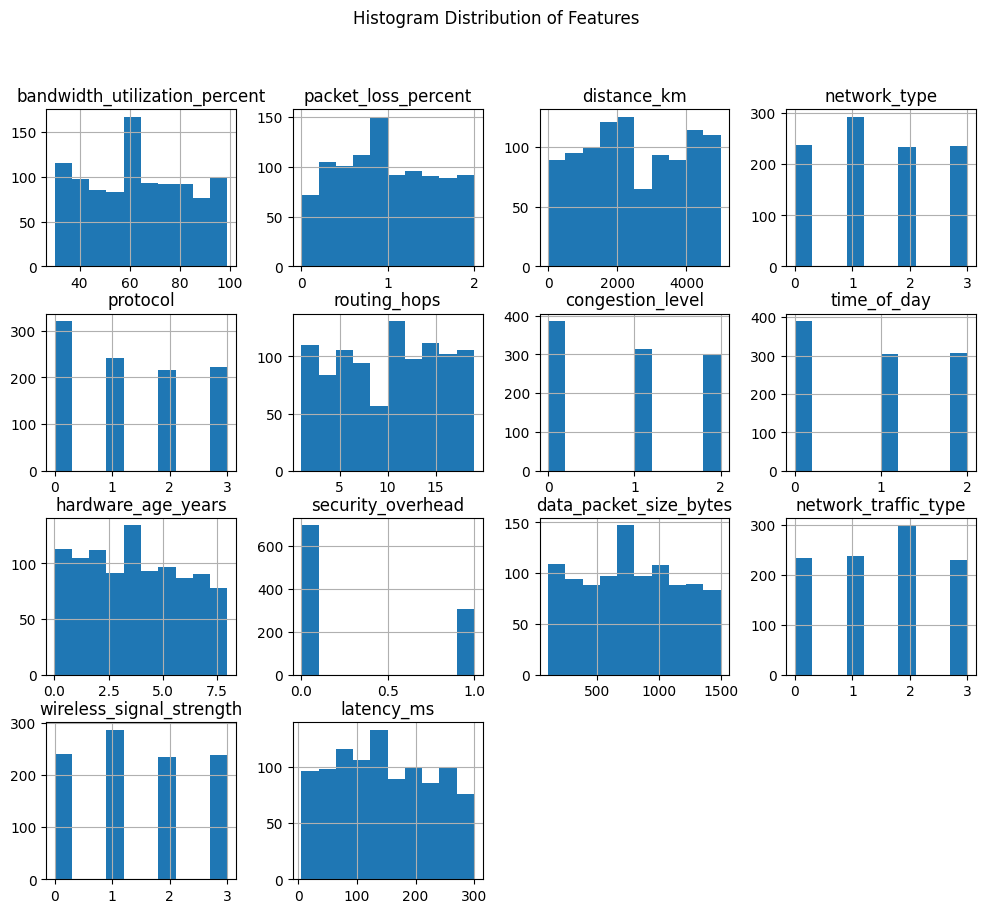

In [ ]:
df.hist(figsize=(12,10))
plt.suptitle("Histogram Distribution of Features")     ##Check if data is normally distributed and identify skewness
plt.show()


Scatter Plot Visualization

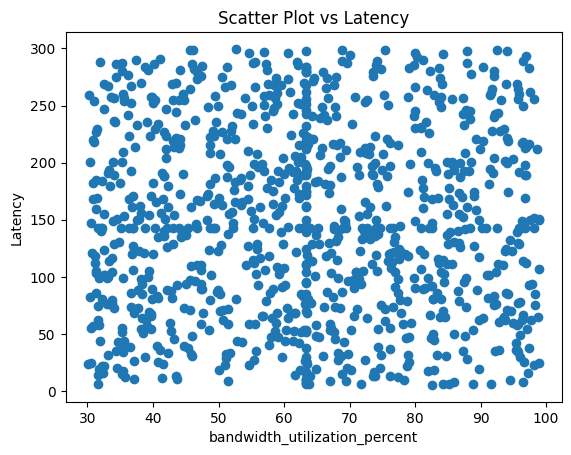

In [ ]:
plt.figure()
plt.scatter(df.iloc[:,0], df["latency_ms"])
plt.xlabel(df.columns[0])
plt.ylabel("Latency")
plt.title("Scatter Plot vs Latency")
plt.show()


Correlation Heatmap

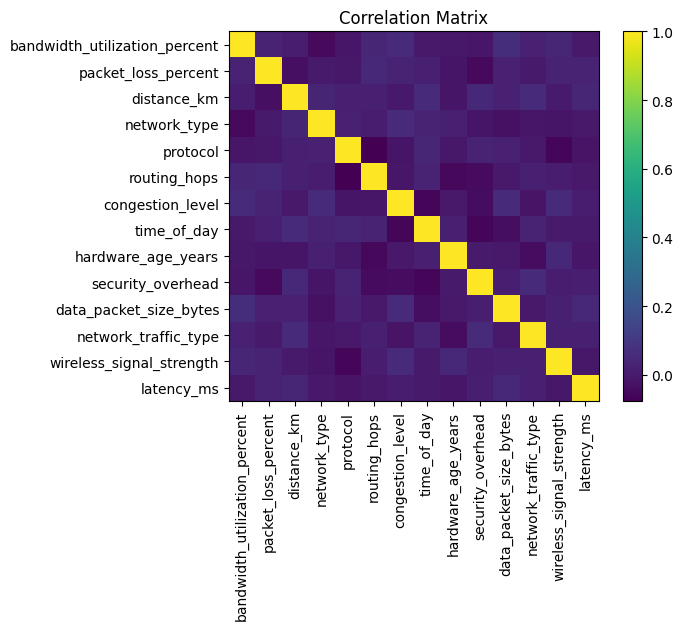

In [ ]:
corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.show()


BoxPlot

Box plot for all numerical columns

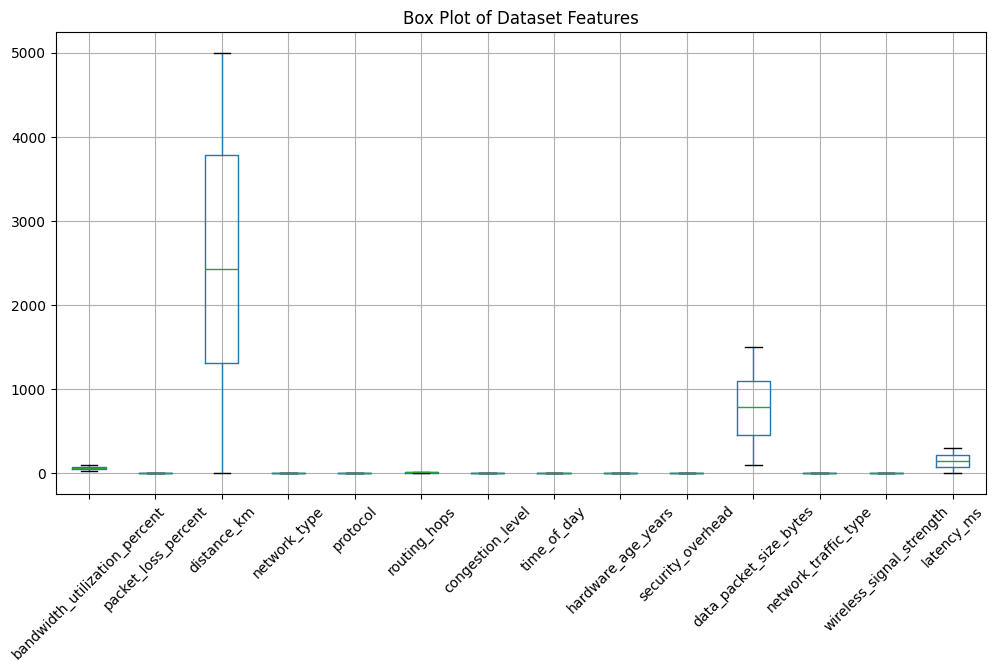

In [ ]:
import matplotlib.pyplot as plt            #outlier detection

plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Box Plot of Dataset Features")
plt.xticks(rotation=45)
plt.show()


Box plot for all numerical features separately

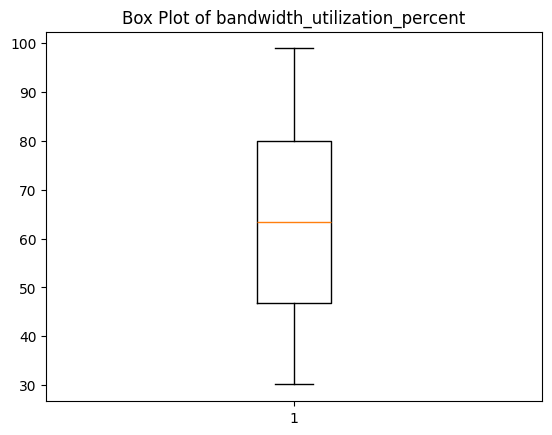

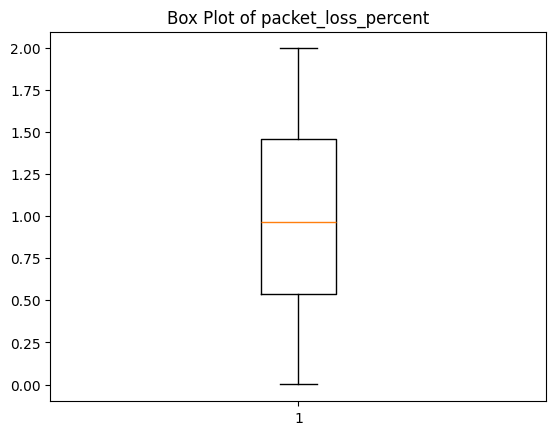

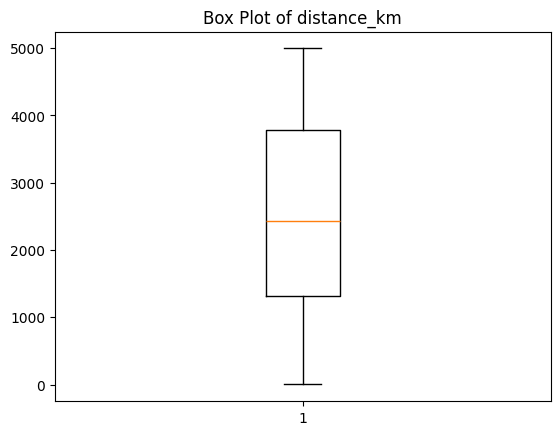

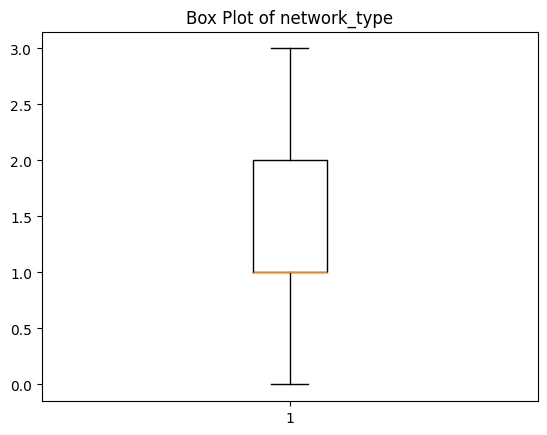

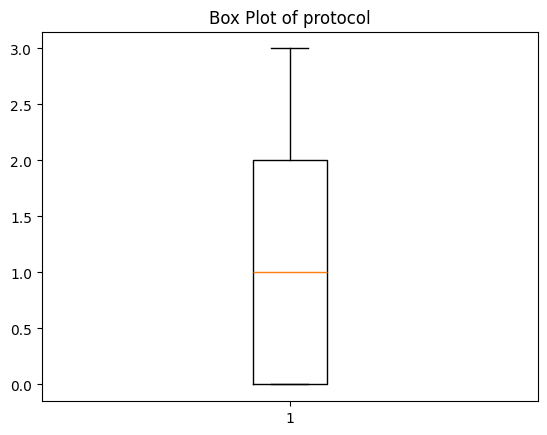

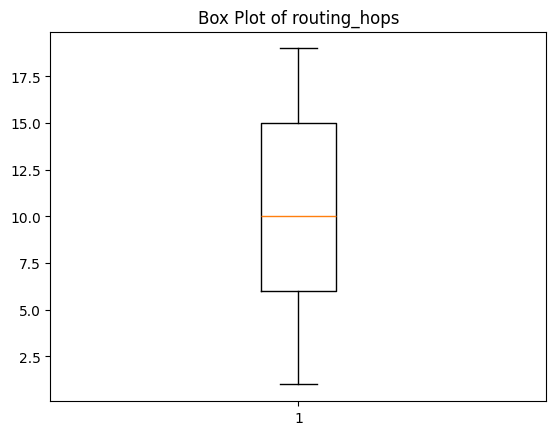

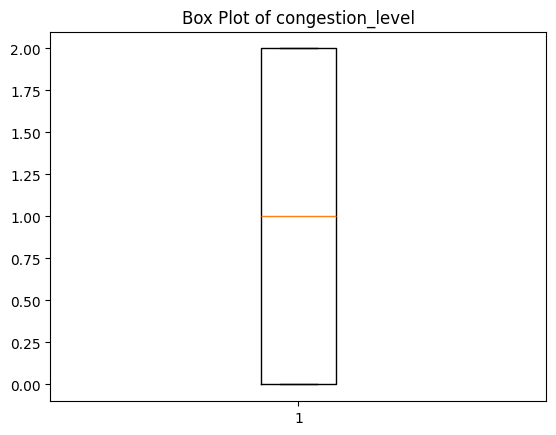

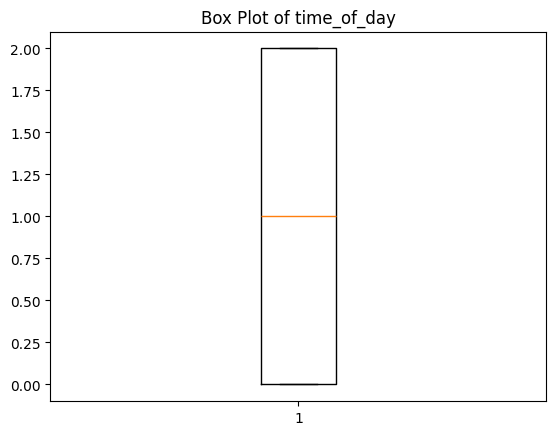

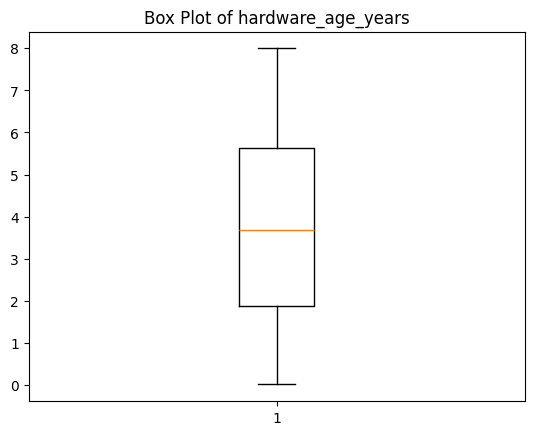

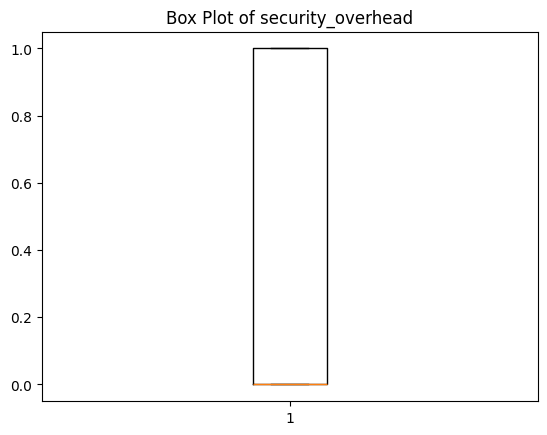

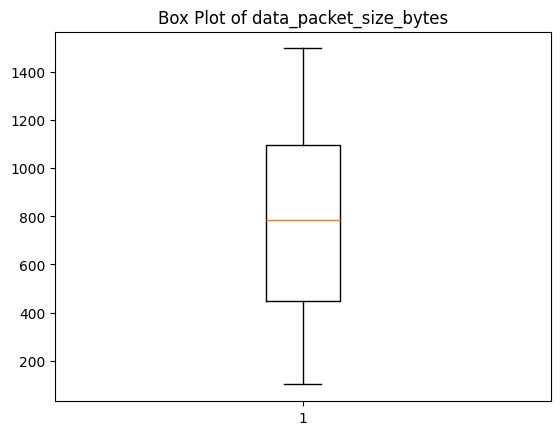

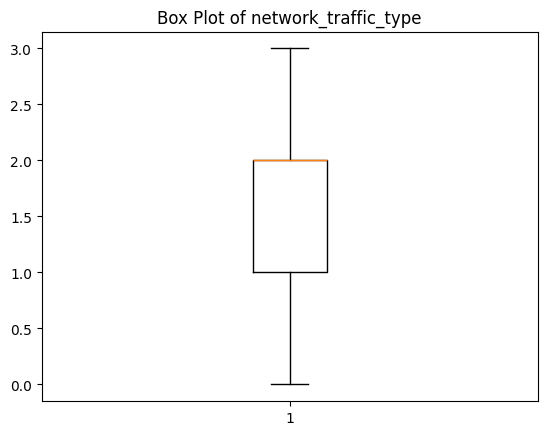

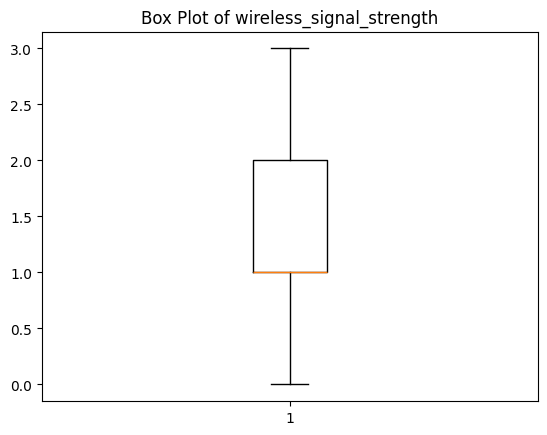

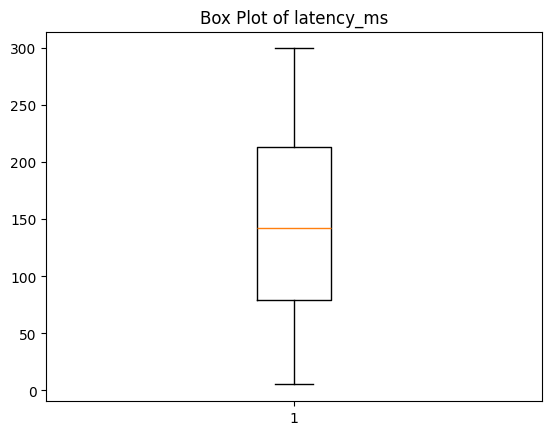

In [ ]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


Feature Importance

In [ ]:
#Feature importance ranks input features based on their contribution to the model’s predictions.import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("network_latency_cleaned.csv")

# Separate features and target
X = df.drop("latency_ms", axis=1)   # Change if your target column name is different
y = df["latency_ms"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Create importance dataframe
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


                          Feature  Importance
1             packet_loss_percent    0.148448
10         data_packet_size_bytes    0.141679
8              hardware_age_years    0.140035
2                     distance_km    0.130845
0   bandwidth_utilization_percent    0.129220
5                    routing_hops    0.086797
12       wireless_signal_strength    0.039038
3                    network_type    0.038008
11           network_traffic_type    0.037627
4                        protocol    0.034187
7                     time_of_day    0.031308
6                congestion_level    0.026014
9               security_overhead    0.016792


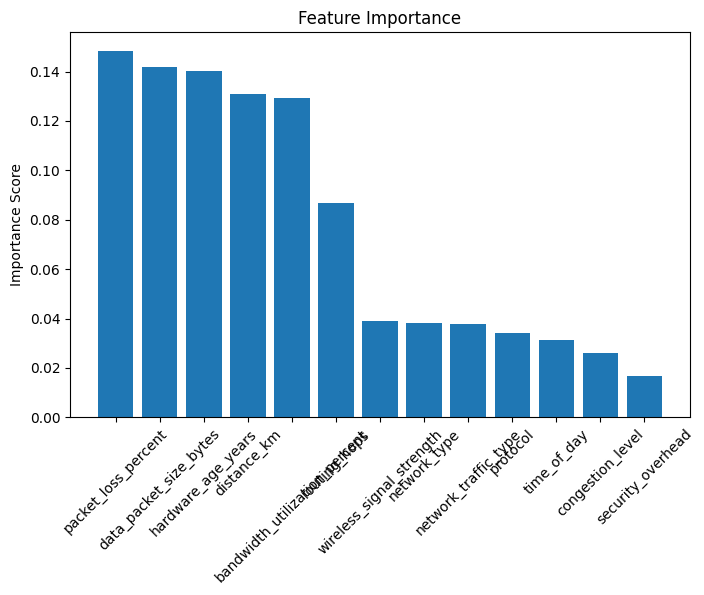

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


Feature Selection & Scaling

In [ ]:
X = df.drop(columns=["latency_ms"])
y = df["latency_ms"]

scaler = StandardScaler()            # Machine learning models perform better when:Data is centered around 0 and Standard deviation = 1
X_scaled = scaler.fit_transform(X)


Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,                                                #Avoids overfitting
    y,
    test_size=0.2,
    random_state=42
)


Regression Models

In [ ]:
print("\n========== REGRESSION MODELS ==========")

regressors = {
    "Linear Regression": LinearRegression(),                                  #Assumes linear relationship and simple and interpretable.
    "Decision Tree": DecisionTreeRegressor(),                                 #Splits data based on feature conditions andHandles non-linear relationships.
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42) #Reduces overfitting and Generally gives better accuracy.
}

for name, model in regressors.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{name}")
    print("R2:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))



========== REGRESSION MODELS ==========

Linear Regression
R2: -0.002087242549353663
MAE: 75.59872772431066
RMSE: 87.43156686850261

Decision Tree
R2: -0.9146940744130432
MAE: 99.44820251079403
RMSE: 120.85515828404824

Random Forest
R2: -0.05214717675430314
MAE: 77.71362314009575
RMSE: 89.58880464264008


Convert Regression to Classification

In [ ]:
df["latency_class"] = pd.cut(
    df["latency_ms"],
    bins=[-1,20,50,1000],
    labels=[0,1,2]
)


Prepare Classification Data

In [ ]:
#Target becomes categorical.
X_cls = df.drop(columns=["latency_ms","latency_class"])
y_cls = df["latency_class"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled,
    y_cls,
    test_size=0.2,
    random_state=42
)


Conventional Classification Models

In [ ]:
print("\n========== CLASSIFICATION MODELS ==========")

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000), #Works for classification and finds probability of class.
    "Decision Tree Classifier": DecisionTreeClassifier(),    #Tree-based rule splitting and Easy to interpret.
    "KNN Classifier": KNeighborsClassifier()                 #Classifies based on nearest neighbors andDistance-based learning.
}

for name, model in classifiers.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test_c, preds))



========== CLASSIFICATION MODELS ==========

Logistic Regression
Accuracy: 0.835

Decision Tree Classifier
Accuracy: 0.695

KNN Classifier
Accuracy: 0.815


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
data_size = 200
bandwidth = np.random.uniform(10, 100, data_size)  # Mbps
packet_loss = np.random.uniform(0, 5, data_size)   # %
latency = 20 + 0.5*bandwidth + 10*packet_loss + np.random.normal(0, 5, data_size)

df = pd.DataFrame({
    'Bandwidth': bandwidth,
    'PacketLoss': packet_loss,
    'Latency': latency
})

df.to_csv("network_data.csv", index=False)
print(df.head())


   Bandwidth  PacketLoss    Latency
0  43.708611    3.210158  80.483282
1  95.564288    0.420700  72.094161
2  75.879455    0.808144  69.430928
3  63.879264    4.492771  95.316007
4  24.041678    3.032145  63.963124


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load dataset
df = pd.read_csv("network_data.csv")
X = df[['Bandwidth', 'PacketLoss']]
y = df['Latency']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict example
print("Example prediction:", model.predict([[50, 2]]))  # Bandwidth=50 Mbps, PacketLoss=2%


Example prediction: [65.18559995]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
def predict_latency(bandwidth, packet_loss):
    # Input comes from Gradio sliders or textboxes
    import numpy as np
    X_input = np.array([[bandwidth, packet_loss]])
    predicted_latency = model.predict(X_input)[0]
    return round(predicted_latency, 2)


In [ ]:
pip install gradio


In [ ]:
import gradio as gr     #Upgrade
print(gr.__version__)


5.50.0


In [ ]:
import gradio as gr                           #verify
print(gr.__version__)  # Should be 3.x or higher


5.50.0


In [ ]:
import gradio as gr
import numpy as np
from sklearn.linear_model import LinearRegression

# Dummy data and model
X = np.array([[10, 0], [50, 1], [80, 2]])  # Bandwidth, PacketLoss
y = np.array([25, 55, 90])  # Latency in ms
model = LinearRegression().fit(X, y)

# Function to predict latency
def predict_latency(bandwidth, packet_loss):
    return round(model.predict([[bandwidth, packet_loss]])[0], 2)

# Gradio interface
interface = gr.Interface(
    fn=predict_latency,
    inputs=[
        gr.Slider(0, 100, label="Bandwidth Utilization (Mbps)"),
        gr.Slider(0, 10, label="Packet Loss (%)")
    ],
    outputs=gr.Textbox(label="Estimated Latency (ms)"),
    title="Network Latency Estimator"
)

# Launch app with shareable link
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0905c38e37cd5f94a0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


FORMULA

latency=20+0.5(bandwidth)+10(packet loss)